1. (3 балла) С помощью requests скачайте главную страницу https://meduza.io/ . Для каждой новости получите как давно она была опубликована. Постройте гистограму, где по x будет время в часах, а по y - количество новостей в данный час.

2. (3 балла) На страничке постеров к Звездным войнам скачайте каждый из постеров: https://www.kinopoisk.ru/film/zvyozdnye-voyny-poslednie-dzhedai-2017-718223/posters/ . Воспользуйтесь requests и beatiful soup.

3. (3 балла) На сайте https://auto.ru/ в шапке представлены марки автомобилей и рядом количество объявлений. Загрузите сайт с помощью requests, с помощью beautiful soup получите информацию о марках и соответствующих числах. Постройте countplot, где по x будет марка, а по y - количество объявлений.

4. (3 балла) На сайте https://www.kaggle.com/competitions?sortBy=prize&group=general&page=1&pageSize=100 представлены соревнования по машинному обучению, скачайте сайт с помощью requests. Для каждого сореванония из html сайта получите призовой фонд и количество команд-учатников. Отсортируйте соревнования по количеству команд. Постройте график, в котором по x будет количество команд-участников, а по y - размер призового фонда. 

# 1

In [5]:
import requests
resp = requests.get('https://meduza.io/')

In [6]:
from bs4 import BeautifulSoup as bs
soup = bs(resp.content)

In [75]:
def time_str_to_hours(time_str):
    time_str_split = time_str.split()
    try:
        number = int(time_str_split[0])
    except ValueError as e:
        number = 1
    if 'сек' in time_str:
        return number / 60 / 60
    if 'мин' in time_str:
        return number / 60
    if 'час' in time_str:
        return number
    if 'дн' in time_str or 'день' in time_str:
        return number * 24
    if 'недел' in time_str:
        return number * 24 * 7
    if 'месяц' in time_str:
        return number * 24 * 7 * 30
    if 'год' in time_str or 'лет' in time_str:
        return number * 24 * 365
    

publication_hours_passed = []

for tag in soup.find_all('time', attrs={'class': 'Timestamp-root'}):
    publication_hours_passed.append(time_str_to_hours(tag.text))

import numpy as np
publication_hours_passed = np.array(publication_hours_passed) 

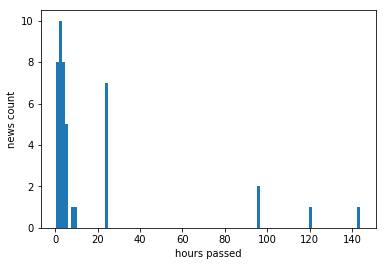

In [76]:
import matplotlib.pyplot as plt
plt.hist(publication_hours_passed[publication_hours_passed < (7 * 24)], bins=100)
plt.xlabel('hours passed')
plt.ylabel('news count')
plt.show()

# 1, второй способ:

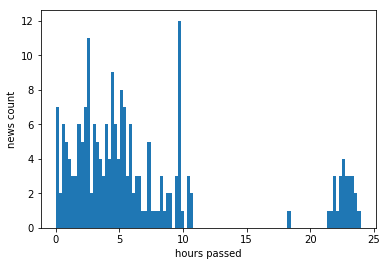

In [77]:
import requests
resp = requests.get('https://meduza.io/api/w4/index')

from datetime import datetime

publication_hours_passed = []
for document in resp.json()['documents'].values():
    time_delta = datetime.now() - datetime.fromtimestamp(document['datetime'])
    publication_hours_passed.append(time_delta.seconds / 3600)

    
import numpy as np
publication_hours_passed = np.array(publication_hours_passed) 

import matplotlib.pyplot as plt
plt.hist(publication_hours_passed[publication_hours_passed < (7 * 24)], bins=100)
plt.xlabel('hours passed')
plt.ylabel('news count')
plt.show()

# 2

In [105]:
resp = requests.get('https://www.kinopoisk.ru/film/zvyozdnye-voyny-poslednie-dzhedai-2017-718223/posters/ ')
soup = bs(resp.content)

На это отвечает, что "Если вы видите эту страницу, значит с вашего IP-адреса поступило необычно много запросов. 
Система защиты от роботов решила, что c данного IP запросы отправляются автоматически, и ограничила доступ."
Хотя если зайти в браузере на этот урл, страничка открывается корректно.

Попробуем добавить headers и cookies из браузера (их можно найти в браузере, найдя запрос), чтобы показать, что мы не робот.

Чтобы не тратить время на составление диктов для header'ов и cookies, можно воспользоваться https://curl.trillworks.com

In [8]:
cookies = {
    'key': 'value'
    # не могу показывать свои cookies..
}

headers = {
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 YaBrowser/18.9.0.3363 Yowser/2.5 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'ru,en;q=0.9',
}

resp = requests.get('https://www.kinopoisk.ru/film/718223/posters/', headers=headers, cookies=cookies)

In [114]:
soup = bs(resp.content)

In [159]:
def download_image(url, file_name):
    print(url, file_name)
    response = requests.get(url)
    if response.status_code == 200:
        with open(file_name, 'wb') as f:
            f.write(response.content)
    else:
        print('Failed to download img', url)
        print('response.status_code', response.status_code )

paginator = soup.find('table', attrs={'class': 'js-rum-hero'})
for img_tag in paginator.find_all('img'):
    download_image(img_tag['src'], img_tag['src'].split('/')[-1])

# 3

In [9]:
resp = requests.get('https://auto.ru/', cookies=cookies, headers=headers)
soup = bs(resp.content)

In [10]:
for car_mark in soup.find_all('a', attrs={'class': 'IndexMarks__item'}):
    mark = car_mark.find('div', attrs={'class': 'IndexMarks__item-name'}).text
    count = car_mark.find('div', attrs={'class': 'IndexMarks__item-count'}).text
    print(mark, count)

LADA (ВАЗ) 11644
Audi 7377
BMW 10261
Cadillac 587
Chevrolet 4413
Citroen 1469
Daewoo 1114
Ford 8335
Great Wall 538
Honda 1804
Hyundai 7301
Infiniti 1539
Jaguar 566
Jeep 1023
Kia 7654
Land Rover 2638
Lexus 2439
Mazda 3492
Mercedes-Benz 14447
Mitsubishi 5734
Nissan 7858
Opel 4064
Peugeot 2129
Porsche 1088
Renault 5807
Skoda 5977
SsangYong 999
Subaru 1149
Suzuki 1373
Toyota 8251
Volkswagen 9586
Volvo 3188
ГАЗ 853
УАЗ 1272


...так мы можем достать список машин, которые отображаются в верхней панели. Но есть еще кнопка "Все марки", которая отображает больше марок машин. Информация про все марки находится в теге ```<script id="initial-state" type="application/json">``` в самом конце html

In [11]:
import json
json_data_str = soup.find('script', attrs={'id': "initial-state", 'type': 'application/json'}).text
json_data = json.loads(json_data_str)

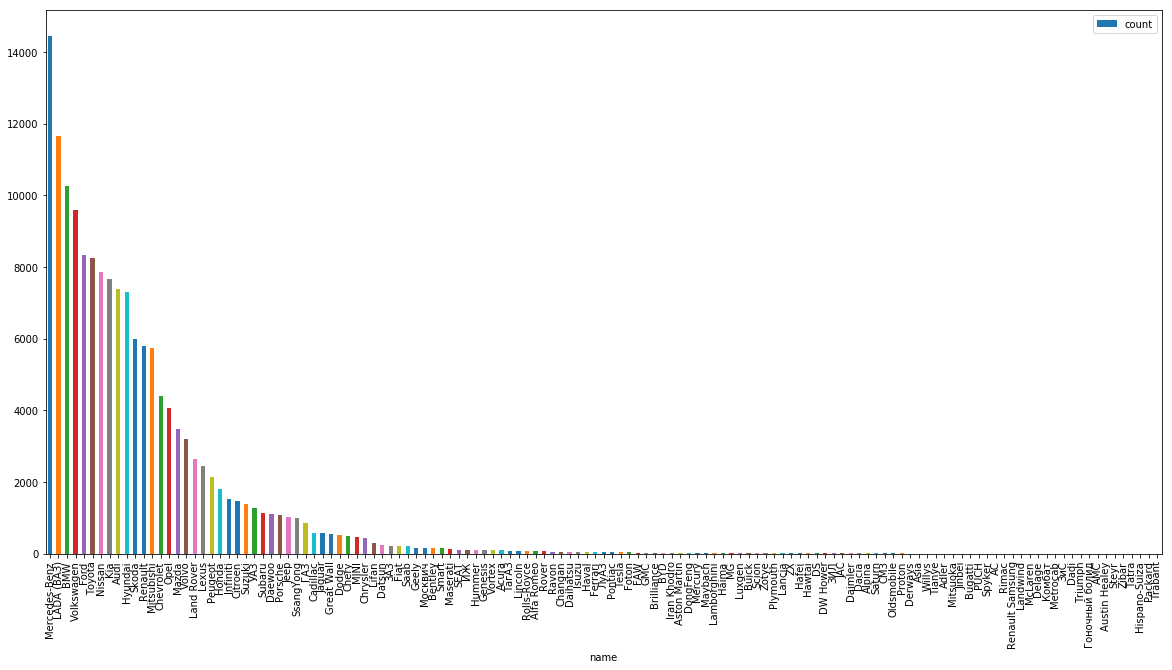

In [17]:
%matplotlib inline
import pandas as pd
df = pd.DataFrame(json_data['indexBreadcrumbs']['marks'])
df = df[df['count'] > 0]
df.sort_values(by='count', inplace=True, ascending=False)

df.plot.bar(x='name', y='count', rot=90, figsize=(20,10));

# 4

In [18]:
resp = requests.get('https://www.kaggle.com/competitions?sortBy=prize&group=general&page=1&pageSize=100')

In [31]:
text_after_competition_list = resp.text[resp.text.find('ViewCompetitionList'):]

In [45]:
text_after_push = text_after_competition_list[text_after_competition_list.find('{"sortByOptions'):
                                              text_after_competition_list.find(');performance')]

In [55]:
import json
competitions_json = json.loads(text_after_push)
teams_count_and_reward = []
for competition in competitions_json['pagedCompetitionGroup']['competitions']:
    teams_count_and_reward.append((competition['totalTeams'], competition['rewardQuantity']))

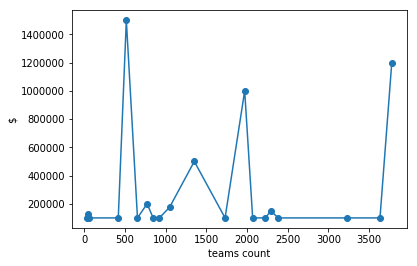

In [74]:
import numpy as np
import matplotlib.pyplot as plt
teams_count_and_reward_arr = np.array(sorted(teams_count_and_reward))
plt.plot(teams_count_and_reward_arr[:,0], teams_count_and_reward_arr[:,1], marker='o')
plt.xlabel('teams count')
plt.ylabel('$');